In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from  sklearn.datasets import load_iris

## Loading iris data

In [3]:
iris_data = load_iris()

In [5]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
data = iris_data["data"]
target = iris_data["target"]

In [7]:
## all features
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
## all classes
iris_data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
df = pd.DataFrame(data, columns=iris_data["feature_names"])

In [14]:
df["classes"] = target

In [24]:
df.columns = df.columns.str.removesuffix("(cm)").str.strip()

In [25]:
df.head()

,sepal length,sepal width,petal length,petal width,classes
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Note:** Only selecting the Setosa and Versicolor classes

In [26]:
filter = (df["classes"] == 0) | (df["classes"] == 1)
df2 = df[filter]

In [27]:
df2.head()

,sepal length,sepal width,petal length,petal width,classes
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
data_x =  df2[["petal length", "petal width"]]
data_y =  df2["classes"] 

## Plotting the data with classes

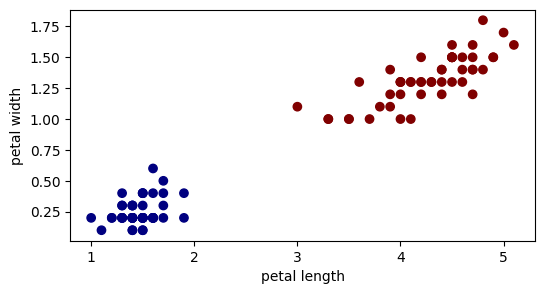

In [41]:
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(data_x["petal length"], data_x["petal width"], c=data_y, cmap='jet')

ax.set_xlabel("petal length")
ax.set_ylabel("petal width")
plt.show()

## Creating the SVC Model

In [42]:
svc_clf = SVC(kernel="linear", degree=1)

In [43]:
svc_clf.fit(data_x, data_y)

SVC(degree=1, kernel='linear')

In [46]:
svc_clf.coef_, svc_clf.intercept_

(array([[1.1, 0.7]]), array([-3.27999997]))

In [47]:
w = svc_clf.coef_[0]
b = svc_clf.intercept_[0]

In [48]:
w,b

(array([1.1, 0.7]), -3.2799999713897705)

In [49]:
## a/b, c/b
## y = mx +c 
## m = w[0]/w[1]
## c = c/w[1]
x0 = np.linspace(0,6.0,100)
y = -(w[0]/w[1])*x0 - b/w[1]

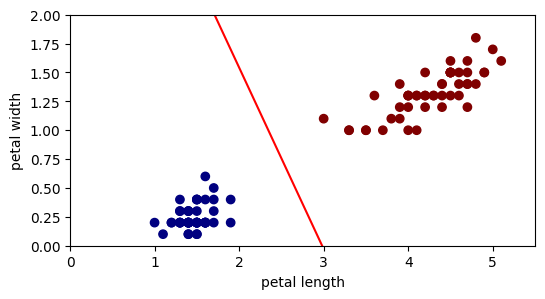

In [54]:
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(data_x["petal length"], data_x["petal width"], c=data_y, cmap='jet')

ax.plot(x0,y, color='red')
ax.set_xlabel("petal length")
ax.set_ylabel("petal width")
ax.axis([0,5.5, 0, 2])
plt.show()